In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dat= pd.read_csv("C:/Users/Farhan/Documents/python jupyter/Datasets/car_purchasing.csv",encoding="ISO-8859-1")


In [4]:
dat.head()

,country,gender,age,average_annual_Salary,average_credit_card_debt,net_worth,car_purchase_amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   500 non-null    object 
 1   gender                    500 non-null    int64  
 2   age                       500 non-null    float64
 3   average_annual_Salary     500 non-null    float64
 4   average_credit_card_debt  500 non-null    float64
 5   net_worth                 500 non-null    float64
 6   car_purchase_amount       500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


C:\Users\Farhan\AppData\Local\Temp\ipykernel_6928\1037266180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dat.corr(),annot=True)


<Axes: >

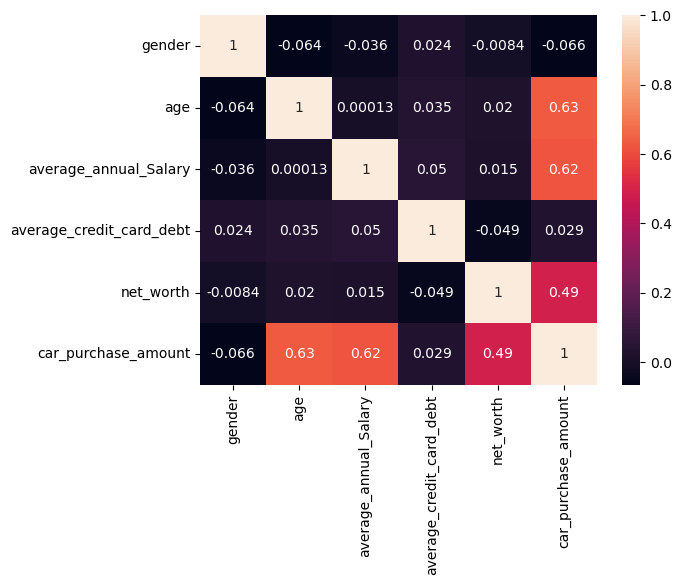

In [6]:
sns.heatmap(dat.corr(),annot=True)

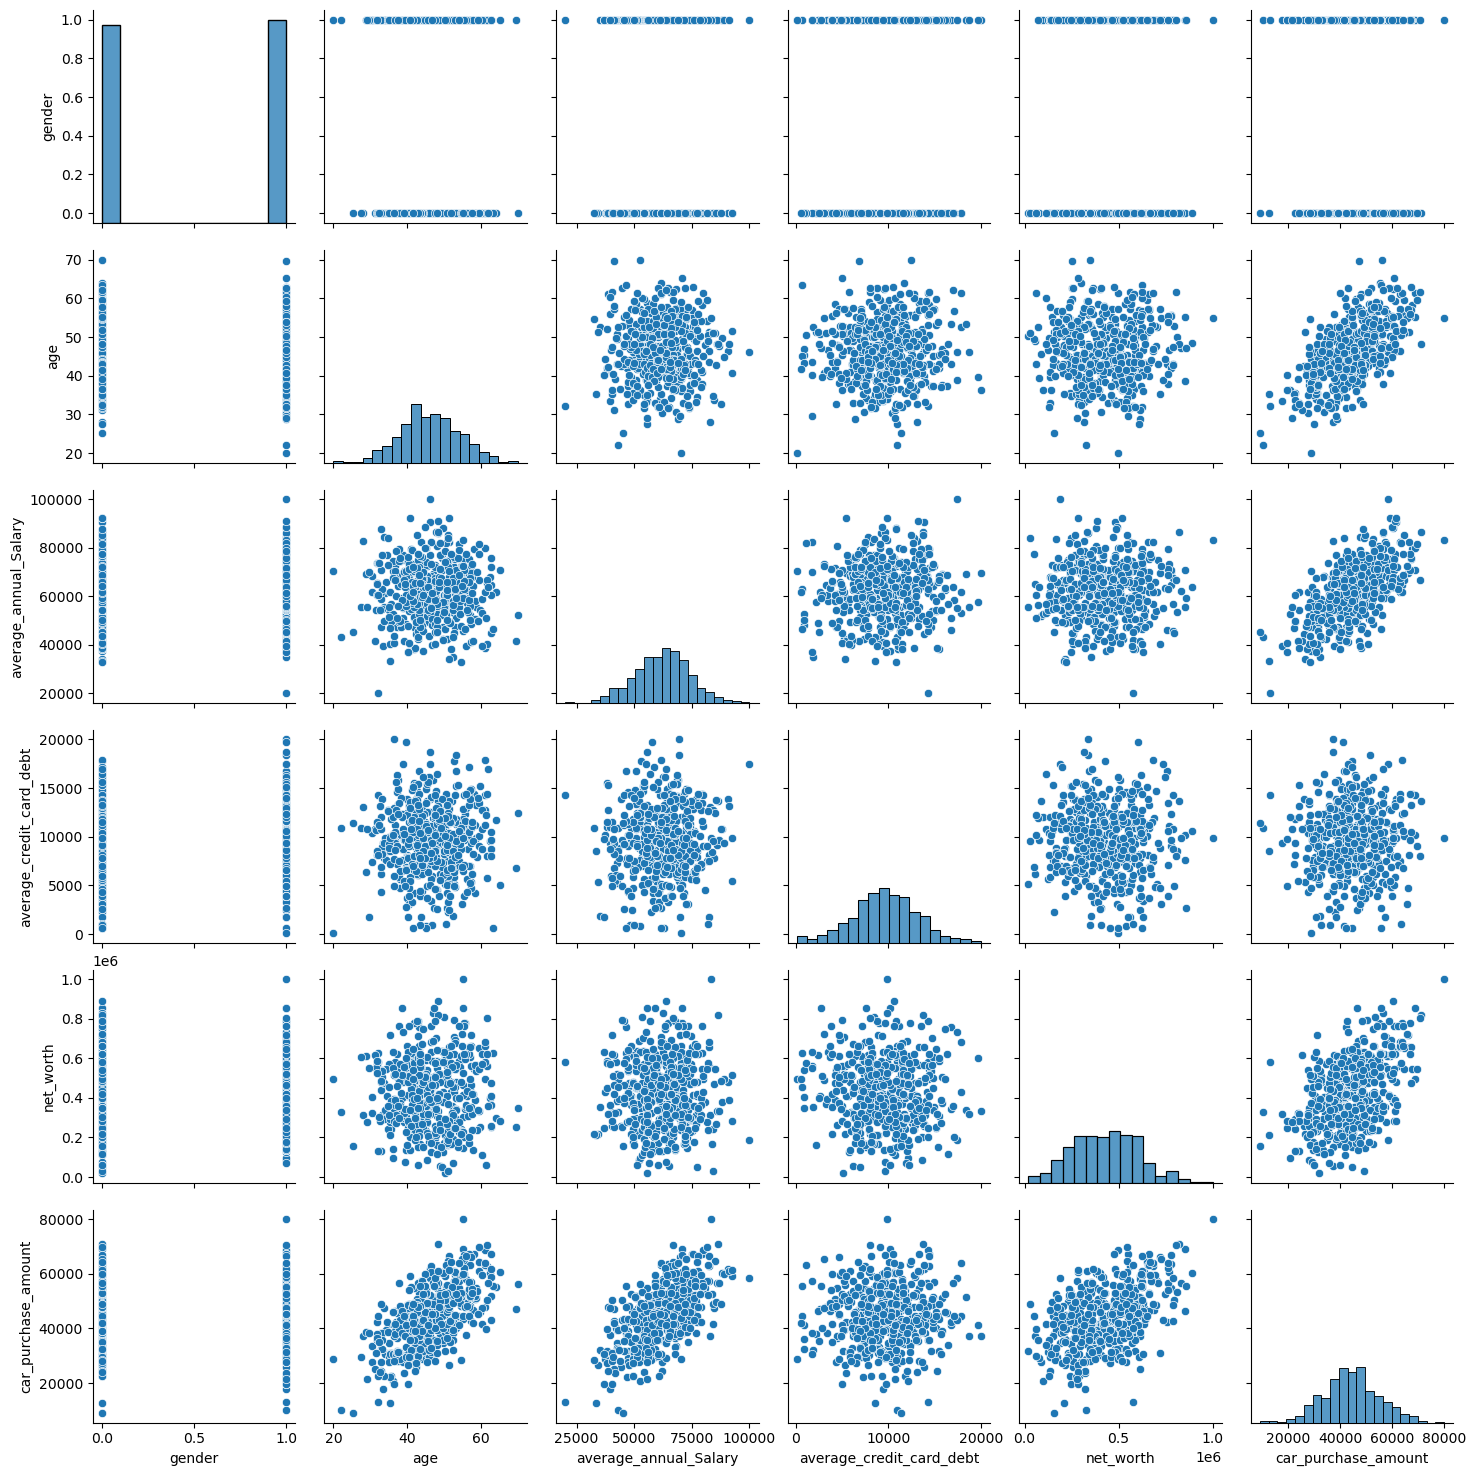

In [7]:
sns.pairplot(dat)

<Axes: xlabel='gender', ylabel='count'>

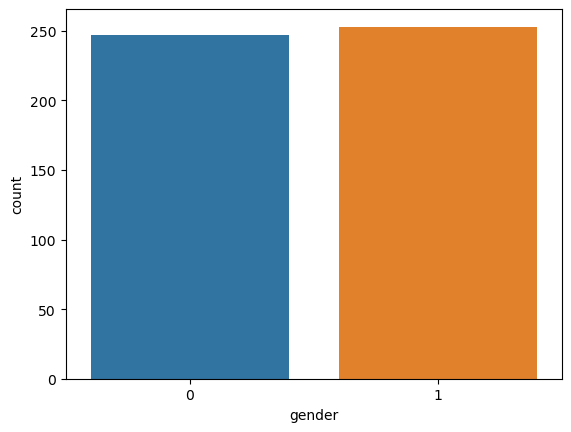

In [8]:
sns.countplot(data=dat, x='gender')

In [9]:
from sklearn.preprocessing import LabelEncoder 

enc = LabelEncoder()

new_column = enc.fit_transform(dat["country"]) 
dat.insert(loc=1, column="country_encoded", value=new_column)

In [10]:
x=dat.iloc[:,1:-1]
y=dat.iloc[:,-1]

In [11]:
from sklearn.linear_model import LinearRegression

model=LinearRegression() 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 1.2548
Mean Squared Error: 2.3825
Root Mean Squared Error: 1.5435
R-squared: 1.0000


In [13]:
country = float(input("Enter the country number in alphabetical:"))
gen = float(input("Enter the gender (Male :0 , Female :1) :"))
age = float(input("Enter the age:"))
avg_ann_sal = float(input("Enter the average annual Salary :"))
avg_cc_debt = float(input("Enter the average credit card debt :"))
nw = float(input("Enter the net worth :"))

new_input = np.array([country,gen,age,avg_ann_sal,avg_cc_debt,nw])

new_input = new_input.reshape(1,-1)

print('The car purchase amount :',model.predict(new_input))

Enter the country number in alphabetical:250
Enter the gender (Male :0 , Female :1) :0
Enter the age:25
Enter the average annual Salary :16465
Enter the average credit card debt :51
Enter the net worth :1651651
The car purchase amount : [36022.24801118]


C:\Users\Farhan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
